In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("analisi.transparenciacatalunya.cat", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(analisi.transparenciacatalunya.cat,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("vaht-2sjk", limit=49375)

# Convert to pandas DataFrame
dataescol = pd.DataFrame.from_records(results)
dataescol

,curs,codi_centre,denominaci_completa,codi_naturalesa_1_2,nom_naturalesa,codi_titularitat,nom_titularitat,codi_delegaci,nom_delegaci,codi_comarca,...,nom_dm,coordenades_geo_x,coordenades_geo_y,codi_ensenyament,nom_ensenyament,nivell,nombre_grups,nombre_places,places_ofertades_a_la,mixt
0,2022/2023,08016914,El Puig,Privat,Privat,21,Cooperatives,308,Baix Llobregat,11,...,0,1.869977172,41.53756425,EPRILOE,Educació primària,4,1,25,0,NaN
1,2022/2023,08016914,El Puig,Privat,Privat,21,Cooperatives,308,Baix Llobregat,11,...,0,1.869977172,41.53756425,EPRILOE,Educació primària,5,1,25,0,NaN
2,2022/2023,08016914,El Puig,Privat,Privat,21,Cooperatives,308,Baix Llobregat,11,...,0,1.869977172,41.53756425,EPRILOE,Educació primària,6,1,25,0,NaN
3,2022/2023,08020036,Joviat,Privat,Privat,22,Fundacions,1060,Catalunya Central,7,...,0,1.819837763,41.72207248,EPRILOE,Educació primària,5,3,75,0,NaN
4,2022/2023,08020036,Joviat,Privat,Privat,22,Fundacions,1060,Catalunya Central,7,...,0,1.819837763,41.72207248,EPRILOE,Educació primària,6,3,75,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49370,2022/2023,43013191,Institut Escola L'Arrabassada,Públic,Públic,1,Departament d'Educació,143,Tarragona,36,...,NaN,1.272123,41.123335,EPRILOE,Educació primària,3,2,50,0,NaN
49371,2022/2023,43013191,Institut Escola L'Arrabassada,Públic,Públic,1,Departament d'Educació,143,Tarragona,36,...,NaN,1.272123,41.123335,EPRILOE,Educació primària,4,2,46,0,NaN
49372,2022/2023,43013191,Institut Escola L'Arrabassada,Públic,Públic,1,Departament d'Educació,143,Tarragona,36,...,NaN,1.272123,41.123335,EPRILOE,Educació primària,5,2,50,0,NaN
49373,2022/2023,43013191,Institut Escola L'Arrabassada,Públic,Públic,1,Departament d'Educació,143,Tarragona,36,...,NaN,1.272123,41.123335,EPRILOE,Educació primària,6,2,50,0,NaN


In [4]:
pd.to_numeric(dataescol["nombre_grups"])
#results_df["nombre_grups"].plot(kind="bar")
dataescol["nombre_grups"].dtype

dtype('O')

In [5]:
#dataescol["nombre_grups"].hist(kind="bar")

In [6]:
gdataescol = gpd.GeoDataFrame(dataescol, geometry=gpd.points_from_xy(dataescol.coordenades_geo_x, dataescol.coordenades_geo_y))
gdataescol

,curs,codi_centre,denominaci_completa,codi_naturalesa_1_2,nom_naturalesa,codi_titularitat,nom_titularitat,codi_delegaci,nom_delegaci,codi_comarca,...,coordenades_geo_x,coordenades_geo_y,codi_ensenyament,nom_ensenyament,nivell,nombre_grups,nombre_places,places_ofertades_a_la,mixt,geometry
0,2022/2023,08016914,El Puig,Privat,Privat,21,Cooperatives,308,Baix Llobregat,11,...,1.869977172,41.53756425,EPRILOE,Educació primària,4,1,25,0,NaN,POINT (1.86998 41.53756)
1,2022/2023,08016914,El Puig,Privat,Privat,21,Cooperatives,308,Baix Llobregat,11,...,1.869977172,41.53756425,EPRILOE,Educació primària,5,1,25,0,NaN,POINT (1.86998 41.53756)
2,2022/2023,08016914,El Puig,Privat,Privat,21,Cooperatives,308,Baix Llobregat,11,...,1.869977172,41.53756425,EPRILOE,Educació primària,6,1,25,0,NaN,POINT (1.86998 41.53756)
3,2022/2023,08020036,Joviat,Privat,Privat,22,Fundacions,1060,Catalunya Central,7,...,1.819837763,41.72207248,EPRILOE,Educació primària,5,3,75,0,NaN,POINT (1.81984 41.72207)
4,2022/2023,08020036,Joviat,Privat,Privat,22,Fundacions,1060,Catalunya Central,7,...,1.819837763,41.72207248,EPRILOE,Educació primària,6,3,75,0,NaN,POINT (1.81984 41.72207)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49370,2022/2023,43013191,Institut Escola L'Arrabassada,Públic,Públic,1,Departament d'Educació,143,Tarragona,36,...,1.272123,41.123335,EPRILOE,Educació primària,3,2,50,0,NaN,POINT (1.27212 41.12333)
49371,2022/2023,43013191,Institut Escola L'Arrabassada,Públic,Públic,1,Departament d'Educació,143,Tarragona,36,...,1.272123,41.123335,EPRILOE,Educació primària,4,2,46,0,NaN,POINT (1.27212 41.12333)
49372,2022/2023,43013191,Institut Escola L'Arrabassada,Públic,Públic,1,Departament d'Educació,143,Tarragona,36,...,1.272123,41.123335,EPRILOE,Educació primària,5,2,50,0,NaN,POINT (1.27212 41.12333)
49373,2022/2023,43013191,Institut Escola L'Arrabassada,Públic,Públic,1,Departament d'Educació,143,Tarragona,36,...,1.272123,41.123335,EPRILOE,Educació primària,6,2,50,0,NaN,POINT (1.27212 41.12333)


In [7]:
spain = gpd.read_file("BCN500_0101S_LIMITE_ADM.shp", crs="EPSG:4326") 
spain

,ID,ID_CODIGO,ID_TTOPO,FECHA_ALTA,TIPO_0101,CCAA,ETIQUETA,geometry
0,66,0101S,None,20150803093226,05,SAHARA OCCIDENTAL,Berzosilla,"POLYGON Z ((-4.00309 42.76336 0.00000, -4.0075..."
1,5,0101S,None,20100924000000,01,SAHARA OCCIDENTAL,SAHARA OCCIDENTAL,"POLYGON Z ((-13.17496 27.66696 0.00000, -13.16..."
2,6,0101S,None,20100924000000,01,ALGERIA,ALGERIA,"POLYGON Z ((-2.20538 35.08055 0.00000, -2.1993..."
3,11,0101S,None,20100924000000,03,Comunidad Valenciana,Castellón,"MULTIPOLYGON Z (((0.67795 39.84895 0.00000, 0...."
4,14,0101S,None,20100924000000,03,Andalucía,Almería,"MULTIPOLYGON Z (((-3.03654 35.93640 0.00000, -..."
...,...,...,...,...,...,...,...,...
61,124,0101S,None,20100924000000,01,PORTUGAL,PORTUGAL,"MULTIPOLYGON Z (((-7.96734 36.98903 0.00000, -..."
62,129,0101S,None,20100924000000,03,Región de Murcia,Murcia,"MULTIPOLYGON Z (((-0.70834 37.72544 0.00000, -..."
63,131,0101S,None,20150127000000,03,Castilla León,Palencia,"POLYGON Z ((-4.00308 42.76341 0.00000, -4.0092..."
64,7,0101S,None,20150303120334,01,MAURITANIA,MAURITANIA,"POLYGON Z ((-8.66679 27.29046 0.00000, -6.4471..."


In [8]:
catalunya = spain[spain.CCAA.isin(['Cataluña'])]

[2.5 2.5 2.5 ... 5.  5.  5.2]


'\nzoom = plt.axes([1.9,41.2,0.6,41.7])\nzoom.plot(gdataescol[gdataescol.nom_naturalesa == "Públic"],marker=\'o\', color=\'blue\', markersize=a,ax = ax)\nzoom.plot(gdataescol[gdataescol.nom_naturalesa == "Privat"],marker=\'o\', color=\'red\', markersize=a,ax = ax)\nzoom.plot(catalunya,ax=ax,color=\'silver\')\nzoom.set_xlim()\nzoom.set_ylim()\n'

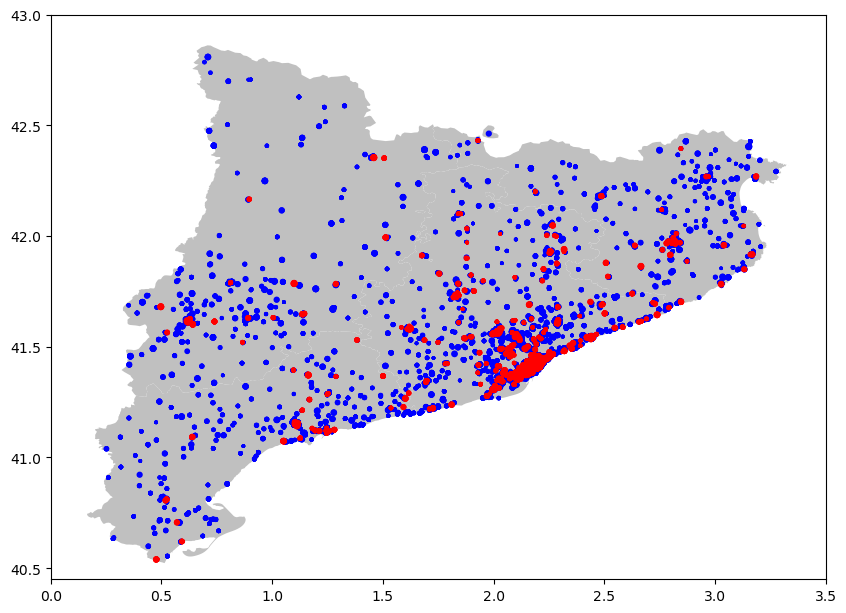

In [9]:
fig, ax =plt.subplots(figsize=(10,10)) 
ax.set_ylim(40.45,43.0)
ax.set_xlim(0.0,3.5)
#ax.set_aspect('equal')
a = np.zeros(len(gdataescol))
catalunya.plot(ax=ax,color='silver')
for i in range(0,len(gdataescol)):
    a[i] = float(dataescol['nombre_places'][i])/10
print(a)
gdataescol[gdataescol.nom_naturalesa == "Públic"].plot(marker='o', color='blue', markersize=a,ax = ax)
gdataescol[gdataescol.nom_naturalesa == "Privat"].plot(marker='o', color='red', markersize=a,ax = ax)
'''
zoom = plt.axes([1.9,41.2,0.6,41.7])
zoom.plot(gdataescol[gdataescol.nom_naturalesa == "Públic"],marker='o', color='blue', markersize=a,ax = ax)
zoom.plot(gdataescol[gdataescol.nom_naturalesa == "Privat"],marker='o', color='red', markersize=a,ax = ax)
zoom.plot(catalunya,ax=ax,color='silver')
zoom.set_xlim()
zoom.set_ylim()
'''

(0.0, 4.0)

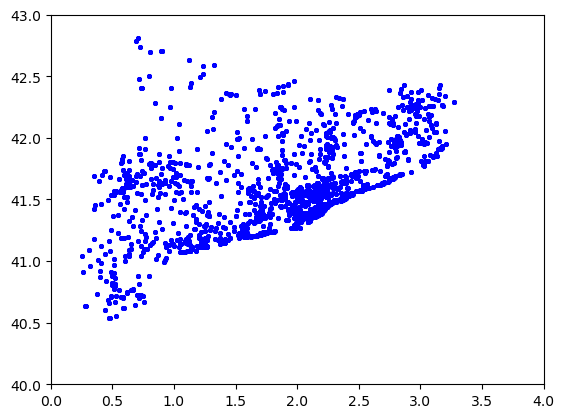

In [10]:
ax = gdataescol[gdataescol.nom_naturalesa == "Públic"].plot(marker='o', color='blue', markersize=5)
ax.set_ylim(40.0,43.0)
ax.set_xlim(0.0,4.0)

In [11]:
gdataescol["nom_titularitat"].value_counts()
gdataescol["nom_titularitat"][2]
dataescol['nombre_places']

0        25
1        25
2        25
3        75
4        75
         ..
49370    50
49371    46
49372    50
49373    50
49374    52
Name: nombre_places, Length: 49375, dtype: object

(array([5.6550e+03, 4.6310e+03, 1.3495e+04, 3.2760e+03, 1.3021e+04,
        2.4590e+03, 2.1080e+03, 2.0460e+03, 3.4800e+02, 3.1400e+02,
        1.4350e+03, 7.1000e+01, 4.6100e+02, 4.0000e+00, 3.0000e+00,
        4.2000e+01, 1.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.,
        132., 144., 156., 168., 180., 192., 204., 216., 228., 240.]),
 <BarContainer object of 20 artists>)

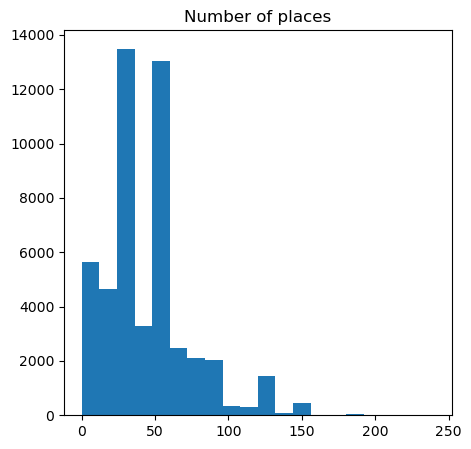

In [12]:
xlist = np.zeros(49375)
for i in range(0,49375):
    xlist[i] = int(dataescol['nombre_places'][i])
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title('Number of places')
plt.hist(xlist,bins=20)

In [13]:
gdataescol["nom_titularitat"].value_counts()

Departament d'Educació            17703
Dept. Educació                    17658
Fundacions                         4543
Societats Mercantils               3360
Ordes i Cong.                      1992
Ordes i Congregacions Catòlics     1917
Cooperatives                       1040
Persones físiques                   185
Corp. Locals                        180
Corporacions Locals                 175
Associacions                        147
Església Catòl.                     134
Església Catòlica                   133
Persones Físiques                   113
Altres titularitats                  35
Altres Titularitats                  34
Altres Confesions Religioses         13
Altres confesions                    13
Name: nom_titularitat, dtype: int64

[2.5 2.5 2.5 ... 5.  5.  5.2]


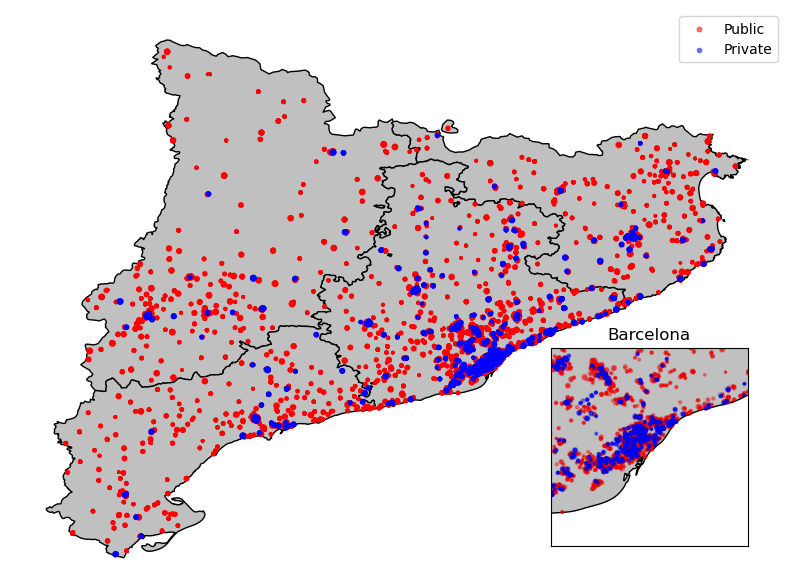

In [14]:
fig, axes =plt.subplots(figsize=(10,10)) 
axes.set_ylim(40.45,43.0)
axes.set_xlim(0.0,3.5)
axes.axis('off')
a = np.zeros(len(gdataescol))
catalunya.plot(ax=axes,color='silver',edgecolor = "black")
for i in range(0,len(gdataescol)):
    a[i] = float(dataescol['nombre_places'][i])/10
print(a)
gdataescol[gdataescol.nom_naturalesa == "Públic"].plot(marker='o', color='red', markersize=a,ax = axes,alpha = 0.5, label = 'Public')
gdataescol[gdataescol.nom_naturalesa == "Privat"].plot(marker='o', color='blue', markersize=a,ax = axes, alpha = 0.5, label = 'Private')
axes.legend()
axes2 = axes.inset_axes([0.65,0.05,0.35,0.35])
axes2.set_xlim(2.0,2.4)
axes2.set_ylim(41.2,41.6)
axes2.get_xaxis().set_visible(False)
axes2.get_yaxis().set_visible(False)
#axes2.axis("off")
axes2.set_title('Barcelona')
catalunya.plot(ax=axes2,color='silver',edgecolor = "black")
gdataescol[gdataescol.nom_naturalesa == "Públic"].plot(marker='o', color='red', markersize=a,ax = axes2, alpha = 0.05)
gdataescol[gdataescol.nom_naturalesa == "Privat"].plot(marker='o', color='blue', markersize=a,ax = axes2,alpha = 0.05)
plt.savefig("Mapafinal.png")

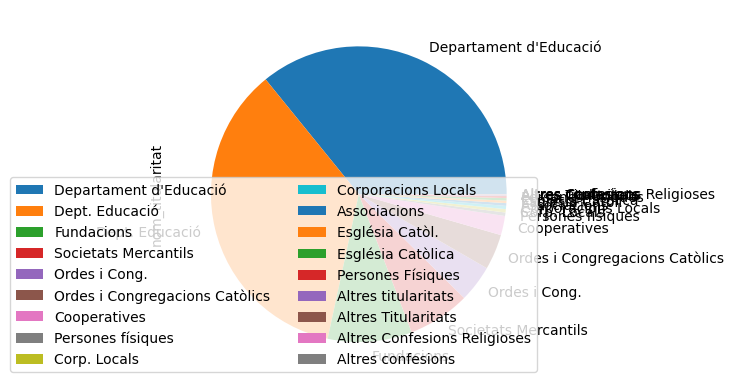

In [15]:
f, ax = plt.subplots()
#int(gdataescol["nom_titularitat"]).plot.pie(y = "nom_titularitat", ax = ax)
gdataescol["nom_titularitat"].value_counts().plot(kind="pie")
plt.legend(loc = 4, ncol = 2)


C:\Users\familia\AppData\Local\Temp\ipykernel_12132\3126299785.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdataescol["nom_titularitat"][i] = "Altres"
C:\Users\familia\AppData\Local\Temp\ipykernel_12132\3126299785.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdataescol["nom_titularitat"][i] = "Fundacions"
C:\Users\familia\AppData\Local\Temp\ipykernel_12132\3126299785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g

<AxesSubplot: ylabel='nom_titularitat'>

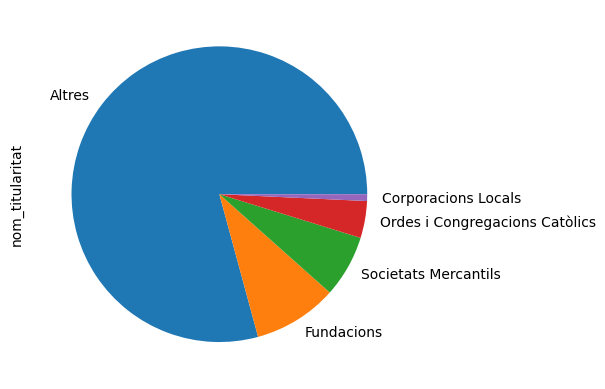

In [16]:
for i in range(len(gdataescol["nom_titularitat"])):
    if gdataescol["nom_titularitat"][i] == "Dept. Eduacació" or gdataescol["nom_titularitat"][i] == "Departament d'Eduacació":
        gdataescol["nom_titularitat"][i] = "Departament d'Eduacació"
    elif gdataescol["nom_titularitat"][i] == "Fundacions":
        gdataescol["nom_titularitat"][i] = "Fundacions"
    elif gdataescol["nom_titularitat"][i] == "Societats Mercantils":
        gdataescol["nom_titularitat"][i] = "Societats Mercantils"
    elif gdataescol["nom_titularitat"][i] == "Ordes i Cong.":
        gdataescol["nom_titularitat"][i] = "Ordes i Congregacions Catòlics"
    elif gdataescol["nom_titularitat"][i] == "Corp. Locals":
        gdataescol["nom_titularitat"][i] = "Corporacions Locals"
    elif gdataescol["nom_titularitat"][i] == "Persones físiques" or gdataescol["nom_titularitat"][i] == "":
        gdataescol["nom_titularitat"][i] = "Corporacions Locals"
    elif gdataescol["nom_titularitat"][i] not in ["Departament d'Eduacació","Fundacions"]:
        gdataescol["nom_titularitat"][i] = "Altres"
gdataescol["nom_titularitat"].value_counts().plot(kind="pie")